# Chapter 8 - Pandas Programming
## <<  Machine Learning with Python  >> 
### C. Alex Hu @ 2018/02/21

## <  CONTENTS  >

[Intro to Pandas](#Intro to Pandas)
- [0. Import Libraries](#Import Libraries)
- [1. Pandas 資料結構](#Data Structure)

[PART I Series (序列)](#PART I Series)
- [2. Creating Series (產生序列)](#Creating Series)
    - [2.1 Using a dictionary to create a Series](#Using a dictionary to create a Series)
    - [2.2 Using a scalar value to create a Series](#Using a scalar value to create a Series)
    - [2.3 Series is ndarray-like](#Series is ndarray-like)
    - [2.4 Series is dict-like](#Series is dict-like)
    - [2.5 Vectorized operations and label alignment with Series](#Vectorized operations and label alignment with Series)
    - [2.6 A key difference between Series and ndarray](#A key difference between Series and ndarray)
    - [2.7 Series can also have a name attribute](#Series can also have a name attribute)
    - [2.8 Time Series (時間序列)](#Time Series)
        - [建立依時間序列排序的資料表](#建立依時間序列排序的資料表)

[PART II DataFrame (資料框)](#PART II DataFrame)
- [3. Creating DataFrame (產生資料框)](#Creating DataFrame)
- [4. Merge, Join, and Concatenate DataFrames](#Merge, Join, and Concatenate DataFrames)
- [5. Summarizing](#Summarizing)
- [6. Manipulation of DataFrame](#Manipulation of DataFrame)
- [7. Quality check](#Quality check)
- [8. Rename Columns](#Rename Columns)
- [9. Dealing with outliers](#Dealing with outliers)
    - [Boxplot](#Boxplot)
    - [Histogram](#Histogram)
- [10. Groupby](#Groupby)
- [11. File I/O](#File I/O)
    - [Write to .csv files](#Write to .csv files)
    - [Read from .csv files](#Read from .csv files)
    - [ Read csv from url](# Read csv from url)

<a id='Intro to Pandas'></a>
# Intro to Pandas
- Python 標準程式庫的延伸，用於資料的處理 (Data Manipulation)
- 一般而言，資料分析的前 80% 時間花在清理和準備資料 (cleaning & preparing data) ; 這就是需要用到 Pandas library 的地方。
- Ref. :  http://pandas.pydata.org/pandas-docs/stable/index.html


<a id="Import Libraries"></a>
## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id="Data Structure"></a>
##   1. Pandas 資料結構 
- The two primary data structures of pandas, Series (序列，1-dimensional) and DataFrame (資料框，2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 
- For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries. 
- pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.
###

<a id="PART I Series"></a>
# PART I     Series (序列)

<a id="Creating Series"></a>
## 2. Creating Series (產生序列)

- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 
- The axis labels are collectively referred to as the index.

In [2]:
s = pd.Series([1,1,2,3,5,8, np.nan, 2018, 223])    #  Using pd.Series(data, index=index) to create Series
print(s)

0       1.0
1       1.0
2       2.0
3       3.0
4       5.0
5       8.0
6       NaN
7    2018.0
8     223.0
dtype: float64


In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -1.132365
b   -0.373314
c   -0.575110
d    0.685677
e   -0.387780
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

<a id='Using a dictionary to create a Series'></a>
### 2.1 Using a dictionary to create a Series

In [5]:
#  Using a dictionary to create a Series
d = {'a' : 0., 'b' : 1., 'c' : 2.}   
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [6]:
pd.Series(d, index=['b', 'c', 'd', 'a'])   #  NaN (not a number) is the standard missing data marker used in pandas

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

<a id='Using a scalar value to create a Series'></a>
### 2.2 Using a scalar value to create a Series

In [7]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

<a id='Series is ndarray-like'></a>

### 2.3 Series is ndarray-like
- Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions.

In [8]:
s[0]

-1.1323652758775575

In [9]:
s[:3]

a   -1.132365
b   -0.373314
c   -0.575110
dtype: float64

In [10]:
s[s > s.median()]

b   -0.373314
d    0.685677
dtype: float64

In [11]:
s[[4, 3, 1]]

e   -0.387780
d    0.685677
b   -0.373314
dtype: float64

In [12]:
np.exp(s)

a    0.322270
b    0.688449
c    0.562643
d    1.985115
e    0.678561
dtype: float64

<a id='Series is dict-like'></a>
### 2.4 Series is dict-like
- A Series is like a fixed-size dict in that you can get and set values by index label.

In [13]:
s['a']

-1.1323652758775575

In [14]:
s['e'] = 12.
s

a    -1.132365
b    -0.373314
c    -0.575110
d     0.685677
e    12.000000
dtype: float64

In [15]:
'e' in s

True

In [16]:
'f' in s

False

In [17]:
s['f']   # If a label is not contained, an exception is raised

KeyError: 'f'

In [18]:
s.get('f')      #  Using the get method, a missing label will return None or specified default

In [19]:
s.get('f', np.nan)

nan

<a id='Vectorized operations and label alignment with Series'></a>
### 2.5 Vectorized operations and label alignment with Series

In [20]:
s + s * 2

a    -3.397096
b    -1.119942
c    -1.725330
d     2.057031
e    36.000000
dtype: float64

In [21]:
np.exp(s)

a         0.322270
b         0.688449
c         0.562643
d         1.985115
e    162754.791419
dtype: float64

<a id='A key difference between Series and ndarray'></a>
###  2.6 A key difference between Series and ndarray 
- is that operations between Series automatically align the data based on label. 
- Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [22]:
s[1:]

b    -0.373314
c    -0.575110
d     0.685677
e    12.000000
dtype: float64

In [23]:
s[:-1]

a   -1.132365
b   -0.373314
c   -0.575110
d    0.685677
dtype: float64

In [24]:
s[1:] + s[:-1]

a         NaN
b   -0.746628
c   -1.150220
d    1.371354
e         NaN
dtype: float64

<a id='Series can also have a name attribute'></a>
### 2.7 Series can also have a name attribute

In [25]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.318898
1    1.430534
2    0.658662
3   -0.364099
4    0.097884
Name: something, dtype: float64

In [26]:
s.name

'something'

In [27]:
s2 = s.rename("different")
s2.name

'different'

<a id='Time Series'></a>
### 2.8 Time Series (時間序列)

In [28]:
dates = pd.date_range('20180301',periods=31)   # pd.date_range()
print(dates)

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
               '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
               '2018-03-29', '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', freq='D')


In [29]:
rng = pd.date_range('3/1/2018', periods=48, freq='H')  #  48 hours starting with midnight March 1st, 2018
rng[:18]

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 01:00:00',
               '2018-03-01 02:00:00', '2018-03-01 03:00:00',
               '2018-03-01 04:00:00', '2018-03-01 05:00:00',
               '2018-03-01 06:00:00', '2018-03-01 07:00:00',
               '2018-03-01 08:00:00', '2018-03-01 09:00:00',
               '2018-03-01 10:00:00', '2018-03-01 11:00:00',
               '2018-03-01 12:00:00', '2018-03-01 13:00:00',
               '2018-03-01 14:00:00', '2018-03-01 15:00:00',
               '2018-03-01 16:00:00', '2018-03-01 17:00:00'],
              dtype='datetime64[ns]', freq='H')

In [30]:
rng[24:48]

DatetimeIndex(['2018-03-02 00:00:00', '2018-03-02 01:00:00',
               '2018-03-02 02:00:00', '2018-03-02 03:00:00',
               '2018-03-02 04:00:00', '2018-03-02 05:00:00',
               '2018-03-02 06:00:00', '2018-03-02 07:00:00',
               '2018-03-02 08:00:00', '2018-03-02 09:00:00',
               '2018-03-02 10:00:00', '2018-03-02 11:00:00',
               '2018-03-02 12:00:00', '2018-03-02 13:00:00',
               '2018-03-02 14:00:00', '2018-03-02 15:00:00',
               '2018-03-02 16:00:00', '2018-03-02 17:00:00',
               '2018-03-02 18:00:00', '2018-03-02 19:00:00',
               '2018-03-02 20:00:00', '2018-03-02 21:00:00',
               '2018-03-02 22:00:00', '2018-03-02 23:00:00'],
              dtype='datetime64[ns]', freq='H')

<a id='建立依時間序列排序的資料表'></a>
### 建立依時間序列排序的資料表

In [31]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)   #  Index pandas objects with dates
ts.head()

2018-03-01 00:00:00    0.506879
2018-03-01 01:00:00    0.880307
2018-03-01 02:00:00   -0.235753
2018-03-01 03:00:00   -1.021960
2018-03-01 04:00:00   -0.794062
Freq: H, dtype: float64

In [32]:
ts[:12]

2018-03-01 00:00:00    0.506879
2018-03-01 01:00:00    0.880307
2018-03-01 02:00:00   -0.235753
2018-03-01 03:00:00   -1.021960
2018-03-01 04:00:00   -0.794062
2018-03-01 05:00:00   -0.279080
2018-03-01 06:00:00   -1.097662
2018-03-01 07:00:00   -1.049926
2018-03-01 08:00:00    1.721206
2018-03-01 09:00:00   -0.564466
2018-03-01 10:00:00   -1.298972
2018-03-01 11:00:00    0.085053
Freq: H, dtype: float64

In [33]:
converted = ts.asfreq('45Min', method='pad')         # Change to 45 minute frequency and forward fill
converted.head()

2018-03-01 00:00:00    0.506879
2018-03-01 00:45:00    0.506879
2018-03-01 01:30:00    0.880307
2018-03-01 02:15:00   -0.235753
2018-03-01 03:00:00   -1.021960
Freq: 45T, dtype: float64

In [34]:
ts.resample('D').mean()     #  Resample for daily means

2018-03-01   -0.11599
2018-03-02    0.10325
Freq: D, dtype: float64

![title](./images/Pandas_TimeSeries.png)

<a id='PART II DataFrame'></a>
#  PART II DataFrame (資料框)

<a id='Creating DataFrame'></a>
##  3. Creating DataFrame (產生資料框)
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
- You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
- It is generally the most commonly used pandas object. 

### 3.1  From dict of Series or dicts

In [35]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
      'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [36]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [37]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


#### The row and column labels can be accessed respectively by accessing the index and columns attributes:

In [38]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [39]:
df.columns

Index(['one', 'two'], dtype='object')

### 3.2  From dict of ndarrays / lists
- The ndarrays must all be the same length. 
- If an index is passed, it must clearly also be the same length as the arrays. 
- If no index is passed, the result will be range(n), where n is the array length.

In [40]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [41]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### 3.3  From structured or record array
- This case is handled identically to a dict of arrays.

In [42]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
print(data)

[(0, 0., b'') (0, 0., b'')]


In [43]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]
print(data)

[(1, 2., b'Hello') (2, 3., b'World')]


In [44]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


###  [NOTE]: b'Hello' is a bytes literal of the string, 'Hello'.

In [45]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [46]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0



###    [ Note ] :    DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.  

###      
### 3.4 From a list of dicts

In [47]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [48]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [49]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [50]:
pd.DataFrame(data2, columns=['a', 'b'])  #  Picking two columns out of data2

,a,b
0,1,2
1,5,10


In [51]:
pd.DataFrame(data2)   #  Checking data2...

,a,b,c
0,1,2,NaN
1,5,10,20.0


### 3.5  From a dict of tuples
- You can automatically create a multi-indexed frame by passing a tuples dictionary

In [52]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [53]:
dftu = pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
                     ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
                     ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
                     ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
                     ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})
print(dftu)

       a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0


In [54]:
dfAB_values = pd.DataFrame(dftu, index=[('A','B')]).values
dfAB_values   #  datatype : an ndarray in NumPy

array([[ 4.,  1.,  5.,  8., 10.]])

In [55]:
print(dfAB_values)
dfAB_values.sum()

[[ 4.  1.  5.  8. 10.]]


28.0

In [56]:
dfAB_values.mean()

5.6

<a id='Merge, Join, and Concatenate DataFrames'></a>
## 4.  Merge, Join, and Concatenate DataFrames
-  https://pandas.pydata.org/pandas-docs/stable/merging.html

### 4.1  Concatenate DataFrame

In [57]:
columns = ['name', 'age', 'gender', 'job']

user1 = pd.DataFrame([['alice', 19, "F", "student"], 
                      ['john', 26, "M", "student"]], 
                     columns=columns)

user2 = pd.DataFrame([['eric', 22, "M", "student"],
                      ['paul', 58, "F", "manager"]],
                     columns=columns)

user3 = pd.DataFrame(dict(name=['peter', 'julie'],
                          age=[33, 44], gender=['M', 'F'],
                          job=['engineer', 'scientist']))

print('user1 : \n', user1, end='\n\n')
print('user2 : \n', user2, end='\n\n')
print('user3 : \n', user3, end='\n\n')

user1 : 
     name  age gender      job
0  alice   19      F  student
1   john   26      M  student

user2 : 
    name  age gender      job
0  eric   22      M  student
1  paul   58      F  manager

user3 : 
    age gender        job   name
0   33      M   engineer  peter
1   44      F  scientist  julie



In [58]:
user1.append(user2)    #  Method 1 : Using append()

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
0,eric,22,M,student
1,paul,58,F,manager


In [59]:
Users = pd.concat([user1, user2, user3])   #  Method 2 : Using concat()
Users

,age,gender,job,name
0,19,F,student,alice
1,26,M,student,john
0,22,M,student,eric
1,58,F,manager,paul
0,33,M,engineer,peter
1,44,F,scientist,julie


In [60]:
Users2 = pd.concat([user3, user2, user1])   # What's the difference between Users & Users2 ?
Users2

,age,gender,job,name
0,33,M,engineer,peter
1,44,F,scientist,julie
0,22,M,student,eric
1,58,F,manager,paul
0,19,F,student,alice
1,26,M,student,john


### [ Ex 4.1 ]  Run the following code segment:

In [61]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])


frames = [df1, df2, df3]

result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


###  Suppose we wanted to associate specific keys with each of the pieces of the chopped up DataFrame. 
###  We can do this using the keys argument:

In [62]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

###  This means that we can now do stuff like select out each chunk by key:

In [63]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


###  Note：If you need to use the operation over several datasets, use a list comprehension.

frames = [ process_your_file(f) for f in files ]

result = pd.concat(frames)

###  
###  4.2 Join DataFrame
- Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects).


In [64]:
user4 = pd.DataFrame(dict(name=['alice', 'john', 'eric', 'julie'],
                          height=[165, 180, 175, 171]))
print(user4)

   height   name
0     165  alice
1     180   john
2     175   eric
3     171  julie


### Use intersection of keys from both frames

In [65]:
merge_inter = pd.merge(Users, user4, on="name")
print(merge_inter)

   age gender        job   name  height
0   19      F    student  alice     165
1   26      M    student   john     180
2   22      M    student   eric     175
3   44      F  scientist  julie     171


### Use union of keys from both frames

In [66]:
merge_union = pd.merge(Users, user4, on="name", how='outer')
print(merge_union)

   age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0


##  Brief primer on merge methods (relational algebra)

There are several cases to consider which are very important to understand:

- one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
- many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
- many-to-many joins: joining columns on columns.

### [ Ex 4.2 ]  Run the following code segment:

In [67]:
#　a very basic example with one unique key combination:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


result = pd.merge(left, right, on='key')
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [68]:
#　a more complicated example with multiple join keys:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


result = pd.merge(left, right, on=['key1', 'key2'])
result

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


 ###  Here is a summary of the how options and their SQL equivalent names:
 ![title](./images/Pandas_Join.png)

In [69]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [70]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [71]:
# Use keys from left frame only
result = pd.merge(left, right, how='left', on=['key1', 'key2'])
result

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


### Here is another example with duplicate join keys in DataFrames:

In [72]:
left = pd.DataFrame({'A' : [1,2], 'B' : [2, 2]})
left

,A,B
0,1,2
1,2,2


In [73]:
right = pd.DataFrame({'A' : [4,5,6], 'B': [2,2,2]})
right

,A,B
0,4,2
1,5,2
2,6,2


In [74]:
result = pd.merge(left, right, on='B', how='outer')
result

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


### Checking for duplicate keys
- Users can use the validate argument to automatically check whether there are unexpected duplicates in their merge keys. 
- Key uniqueness is checked before merge operations and so should protect against memory overflows. 
- Checking key uniqueness is also a good way to ensure user data structures are as expected.

In [75]:
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})

right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})

result = pd.merge(left, right, on='B', how='outer', validate="one_to_one")

# MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

###  If the user is aware of the duplicates in the right DataFrame but wants to ensure there are no duplicates in the left DataFrame, one can use the validate=’one_to_many’ argument instead, which will not raise an exception.

In [76]:
pd.merge(left, right, on='B', how='outer', validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


<a id='Summarizing'></a>
## 5. Summarizing 
### examine the users data

In [77]:
users = pd.merge(Users, user4, on="name", how='outer')
users # print the first 30 and last 30 rows

type(users) # DataFrame
users.head() # print the first 5 rows
users.tail() # print the last 5 rows
print(users.describe()) # summarize all numeric columns

users.index # "the index" (aka "the labels")
users.columns # column names (which is "an index")

users.dtypes # data types of each column
users.shape # number of rows and columns
users.values # underlying numpy array
users.info() # concise summary (includes memory usage as of pandas 0.15.0)

             age      height
count   6.000000    4.000000
mean   33.666667  172.750000
std    14.895189    6.344289
min    19.000000  165.000000
25%    23.000000  169.500000
50%    29.500000  173.000000
75%    41.250000  176.250000
max    58.000000  180.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 5 columns):
age       6 non-null int64
gender    6 non-null object
job       6 non-null object
name      6 non-null object
height    4 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes


In [78]:
# summarize all columns ...
print(users.describe(include='all'))
print(users.describe(include=['object'])) # limit to one (or more) types

              age gender      job  name      height
count    6.000000      6        6     6    4.000000
unique        NaN      2        4     6         NaN
top           NaN      M  student  john         NaN
freq          NaN      3        3     1         NaN
mean    33.666667    NaN      NaN   NaN  172.750000
std     14.895189    NaN      NaN   NaN    6.344289
min     19.000000    NaN      NaN   NaN  165.000000
25%     23.000000    NaN      NaN   NaN  169.500000
50%     29.500000    NaN      NaN   NaN  173.000000
75%     41.250000    NaN      NaN   NaN  176.250000
max     58.000000    NaN      NaN   NaN  180.000000
       gender      job  name
count       6        6     6
unique      2        4     6
top         M  student  john
freq        3        3     1


<a id='Manipulation of DataFrame'></a>
## 6. Manipulation of DataFrame
###  6.1  Columns selection

In [79]:
users['gender'] # select one column

0    F
1    M
2    M
3    F
4    M
5    F
Name: gender, dtype: object

In [80]:
type(users['gender']) # Series

pandas.core.series.Series

In [81]:
users.gender # select one column using the DataFrame

0    F
1    M
2    M
3    F
4    M
5    F
Name: gender, dtype: object

In [82]:
# select multiple columns
users[['age', 'gender']] # select two columns

,age,gender
0,19,F
1,26,M
2,22,M
3,58,F
4,33,M
5,44,F


In [83]:
my_cols = ['age', 'gender'] # or, create a list...
users[my_cols] # ...and use that list to select columns

,age,gender
0,19,F
1,26,M
2,22,M
3,58,F
4,33,M
5,44,F


In [84]:
type(users[my_cols]) # DataFrame

pandas.core.frame.DataFrame

### 6.2 Rows selection

In [85]:
# iloc is strictly integer position based
df = users.copy()
print(df)
df.iloc[0] # first row

   age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0


age            19
gender          F
job       student
name        alice
height        165
Name: 0, dtype: object

In [86]:
df.iloc[0, 0] # first item of first row

19

In [87]:
df.iloc[0, 0] = 55
df.iloc[0, 0]

55

In [88]:
users.shape[0]

6

In [89]:
for i in range(users.shape[0]):
    row = df.iloc[i]     # [SettingWithCopyWarning] : A value is trying to be set on a copy of a slice from a DataFrame.
    # row = df.iloc[i][:]
    row.age *= 100       # setting a copy, and not the original frame data.
print(df)                # df is not modified

   age gender        job   name  height
0   55      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0


/Users/macmini1/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [90]:
# loc supports mixed integer and label based access.
df = users.copy()
df.loc[0] # first row
df.loc[0, "age"] # first item of first row
df.loc[0, "age"] = 55

for i in range(df.shape[0]):
    df.loc[i, "age"] *= 10
print(df) # df is modified

   age gender        job   name  height
0  550      F    student  alice   165.0
1  260      M    student   john   180.0
2  220      M    student   eric   175.0
3  580      F    manager   paul     NaN
4  330      M   engineer  peter     NaN
5  440      F  scientist  julie   171.0


### 6.3 Rows selction / filtering

In [91]:
users   #   raw data

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


In [92]:
# logical filtering...
users[users.age < 40]          # only show users with age < 20

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
4,33,M,engineer,peter,NaN


In [93]:
# Equivalent to the following statements...
young_bool = users.age < 40    # or, create a Series of booleans...
young = users[young_bool]      # ...and use that Series to filter rows
young

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
4,33,M,engineer,peter,NaN


In [94]:
users[users.age < 40].job      # select one column from the filtered results

0     student
1     student
2     student
4    engineer
Name: job, dtype: object

In [95]:
users[users.age < 20][['age', 'job']]            # select multiple columns

,age,job
0,19,student


In [96]:
users[(users.age > 20) & (users.gender=='M')]    # use multiple conditions

,age,gender,job,name,height
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
4,33,M,engineer,peter,NaN


In [97]:
users[(users.age < 20) | (users.age > 50)]       # use multiple conditions

,age,gender,job,name,height
0,19,F,student,alice,165.0
3,58,F,manager,paul,NaN


In [98]:
users[users.job.isin(['student', 'engineer'])]   # filter specific values

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
4,33,M,engineer,peter,NaN


### 6.4 Sorting

In [99]:
df = users.copy()
df.age.sort_values() # only works for a Series

0    19
2    22
1    26
4    33
5    44
3    58
Name: age, dtype: int64

In [100]:
df.sort_values(by='age') # sort rows by a specific column

,age,gender,job,name,height
0,19,F,student,alice,165.0
2,22,M,student,eric,175.0
1,26,M,student,john,180.0
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0
3,58,F,manager,paul,NaN


In [101]:
df.sort_values(by='age', ascending=False) # use descending order instead

,age,gender,job,name,height
3,58,F,manager,paul,NaN
5,44,F,scientist,julie,171.0
4,33,M,engineer,peter,NaN
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
0,19,F,student,alice,165.0


In [102]:
df.sort_values(by=['job', 'age']) # sort by multiple columns

,age,gender,job,name,height
4,33,M,engineer,peter,NaN
3,58,F,manager,paul,NaN
5,44,F,scientist,julie,171.0
0,19,F,student,alice,165.0
2,22,M,student,eric,175.0
1,26,M,student,john,180.0


In [103]:
df   #  df remains unchanged.

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


In [104]:
df.sort_values(by=['job', 'age'], inplace=True)  # modify df
df    #  df changes its rows' order.

,age,gender,job,name,height
4,33,M,engineer,peter,NaN
3,58,F,manager,paul,NaN
5,44,F,scientist,julie,171.0
0,19,F,student,alice,165.0
2,22,M,student,eric,175.0
1,26,M,student,john,180.0


### 6.5 Reshaping by pivoting
### >>> “Unpivots” a DataFrame from wide format to long (stacked) format

In [105]:
stacked = pd.melt(users, id_vars="name", var_name="variable", value_name="value")
stacked

,name,variable,value
0,alice,age,19
1,john,age,26
2,eric,age,22
3,paul,age,58
4,peter,age,33
5,julie,age,44
6,alice,gender,F
7,john,gender,M
8,eric,gender,M
9,paul,gender,F


### >>> “pivots” a DataFrame from long (stacked) format to wide format

In [106]:
stacked.pivot(index='name', columns='variable', values='value')

variable,age,gender,height,job
name,,,,
alice,19,F,165,student
eric,22,M,175,student
john,26,M,180,student
julie,44,F,171,scientist
paul,58,F,NaN,manager
peter,33,M,NaN,engineer


### Q1 : 如果執行下列程式敘述，將會出現什麼錯誤訊息呢?
stacked = pd.melt(users, id_vars="age", var_name="variable", value_name="value")

stacked

stacked.pivot(index='name', columns='variable', values='value')

### Q2 : 如果執行下列程式敘述，又將會出現什麼錯誤訊息呢?
stacked = pd.melt(users, id_vars="job", var_name="variable", value_name="value")

stacked

stacked.pivot(index='job', columns='variable', values='value')

<a id='Quality check'></a>
## 7. Quality check
### 7.1 Remove duplicate data

In [107]:
df = users.append(df.iloc[0], ignore_index=True)
print(df, end='\n\n')

# duplicated() :Series of booleans
# True if a row is identical to a previous row
print(df.duplicated())  

   age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0
6   33      M   engineer  peter     NaN

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool


In [108]:
df.duplicated().sum() # count of duplicates

1

In [109]:
df[df.duplicated()] # only show duplicates

,age,gender,job,name,height
6,33,M,engineer,peter,NaN


In [110]:
df.age.duplicated() # check a single column for duplicates

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: age, dtype: bool

In [111]:
df.duplicated(['age', 'gender']).sum() # specify columns for finding duplicates

1

In [112]:
df = df.drop_duplicates() # drop duplicate rows
df

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


### 7.2 Missing data
- Missing values are often just excluded.

In [113]:
df = users.copy()
df

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


In [114]:
df.describe(include='all')      # description of data...

,age,gender,job,name,height
count,6.000000,6,6,6,4.000000
unique,NaN,2,4,6,NaN
top,NaN,M,student,john,NaN
freq,NaN,3,3,1,NaN
mean,33.666667,NaN,NaN,NaN,172.750000
std,14.895189,NaN,NaN,NaN,6.344289
min,19.000000,NaN,NaN,NaN,165.000000
25%,23.000000,NaN,NaN,NaN,169.500000
50%,29.500000,NaN,NaN,NaN,173.000000
75%,41.250000,NaN,NaN,NaN,176.250000


In [115]:
# find missing values in a Series
df.height.isnull() # True if NaN, False otherwise

0    False
1    False
2    False
3     True
4     True
5    False
Name: height, dtype: bool

In [116]:
df.height.notnull() # False if NaN, True otherwise

0     True
1     True
2     True
3    False
4    False
5     True
Name: height, dtype: bool

In [117]:
df[df.height.notnull()] # only show rows where age is not NaN

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
5,44,F,scientist,julie,171.0


In [118]:
df.height.isnull().sum() # count the missing values

2

In [119]:
# find missing values in a DataFrame
df.isnull() # DataFrame of booleans

,age,gender,job,name,height
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True
5,False,False,False,False,False


In [120]:
df.isnull().sum() # calculate the sum of each column

age       0
gender    0
job       0
name      0
height    2
dtype: int64

### Drop missing values

In [121]:
df.dropna() # drop a row if ANY values are missing

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
5,44,F,scientist,julie,171.0


In [122]:
df.dropna(how='all') # drop a row only if ALL values are missing

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


### Fill in the missing values with the mean value.

In [123]:
print(df)
df.height.mean()

   age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0


172.75

In [124]:
df.loc[df.height.isnull(), "height"] = df["height"].mean()
df

,age,gender,job,name,height
0,19,F,student,alice,165.00
1,26,M,student,john,180.00
2,22,M,student,eric,175.00
3,58,F,manager,paul,172.75
4,33,M,engineer,peter,172.75
5,44,F,scientist,julie,171.00


<a id='Rename Columns'></a>
## 8. Rename Columns

In [125]:
df = users.copy()
print(df.columns)

Index(['age', 'gender', 'job', 'name', 'height'], dtype='object')


In [126]:
df.rename_axis("Number")                  # rename_axis 1

,age,gender,job,name,height
Number,,,,,
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


In [127]:
df.rename_axis("Number", axis="columns")  # rename_axis 2

Number,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


In [128]:
df.columns = ['Age', 'Sex', 'Occupation', 'First Name', 'Height']  #  Rename column names
df

,Age,Sex,Occupation,First Name,Height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


<a id='Dealing with outliers'></a>
##  9. Dealing with outliers

In [129]:
#  np.random.normal(loc=0.0, size=1.0, scale=None)
#  https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
size = pd.Series(np.random.normal(loc=175, size=20, scale=10))
size

0     170.383090
1     166.032872
2     163.563536
3     177.306323
4     175.178760
5     159.739026
6     167.153406
7     178.836830
8     163.586161
9     173.683057
10    160.861589
11    189.403773
12    168.832619
13    189.654865
14    165.050699
15    175.361653
16    165.153781
17    166.996958
18    179.885012
19    178.323395
dtype: float64

In [130]:
# Corrupt the first data point
size[0] += 1500
size

0     1670.383090
1      166.032872
2      163.563536
3      177.306323
4      175.178760
5      159.739026
6      167.153406
7      178.836830
8      163.586161
9      173.683057
10     160.861589
11     189.403773
12     168.832619
13     189.654865
14     165.050699
15     175.361653
16     165.153781
17     166.996958
18     179.885012
19     178.323395
dtype: float64

### 9.1 Based on parametric statistics: use the mean
- Assuming random variable follows the normal distribution, we exclude data outside 3 standard-deviations: 
    - Probability that a sample lies within 1 sd: 68.27%
    - Probability that a sample lies within 2 sd: 95%
    - Probability that a sample lies within 3 sd: 99.73% 

In [131]:
size1 = size.copy()
print('mean value = ', size1.mean(), '\n  std dev. = ', size1.std())

mean value =  246.74937032309245 
  std dev. =  335.20018239568674


In [132]:
size1_no_outliers = size1[~((size - size.mean()).abs() > 3 * size.std())]  #  Removing the outlier...
size1_no_outliers   #  After removing the first data point

1     166.032872
2     163.563536
3     177.306323
4     175.178760
5     159.739026
6     167.153406
7     178.836830
8     163.586161
9     173.683057
10    160.861589
11    189.403773
12    168.832619
13    189.654865
14    165.050699
15    175.361653
16    165.153781
17    166.996958
18    179.885012
19    178.323395
dtype: float64

In [133]:
print('mean (no outlier) = ', size1_no_outliers.mean(), 
      '\n         std dev. = ', size1_no_outliers.std())

mean (no outlier) =  171.821279813607 
         std dev. =  8.88494129544017


### 9.2  Based on non-parametric statistics: use the median
- Median absolute deviation (MAD), based on the median, is a robust non-parametric statistics.

In [134]:
size1   #  Raw data...

0     1670.383090
1      166.032872
2      163.563536
3      177.306323
4      175.178760
5      159.739026
6      167.153406
7      178.836830
8      163.586161
9      173.683057
10     160.861589
11     189.403773
12     168.832619
13     189.654865
14     165.050699
15     175.361653
16     165.153781
17     166.996958
18     179.885012
19     178.323395
dtype: float64

In [135]:
size1.median()    #  the median value of size1

171.25783801191233

In [136]:
q1 = size1.quantile(0.25)     # the 1st quartile
q3 = size1.quantile(0.75)     # the 3rd quartile
iqr = q3-q1                   # Interquartile range
range_low  = q1 - 1.5*iqr
range_high = q3 + 1.5*iqr
size1_range = size1.loc[(size1 > range_low) & (size1 < range_high)]  
size1_range

1     166.032872
2     163.563536
3     177.306323
4     175.178760
5     159.739026
6     167.153406
7     178.836830
8     163.586161
9     173.683057
10    160.861589
11    189.403773
12    168.832619
13    189.654865
14    165.050699
15    175.361653
16    165.153781
17    166.996958
18    179.885012
19    178.323395
dtype: float64

In [137]:
print(' Min = ', size1_range.min(),
      '\n Max = ', size1_range.max())

 Min =  159.7390264338769 
 Max =  189.65486540632367


In [138]:
size1_outliers = size1.loc[(size1 < range_low) | (size1 > range_high)]
size1_outliers

0    1670.38309
dtype: float64

<a id='Boxplot'></a>
###  Boxplot

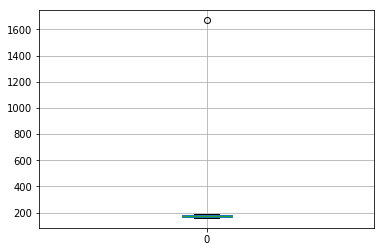

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.DataFrame(size1).boxplot()   #  boxplot for size1

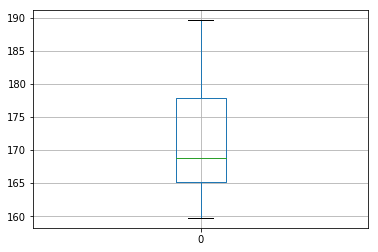

In [140]:
pd.DataFrame(size1_range).boxplot()   #  boxplot for size1_range (without outliers)

<a id='Histogram'></a>
### Histogram

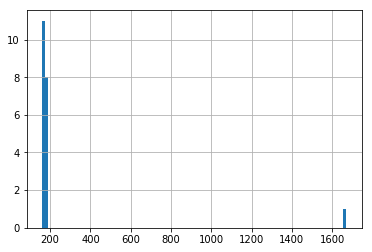

In [141]:
size1.hist(bins=100)   #  histogram for size1

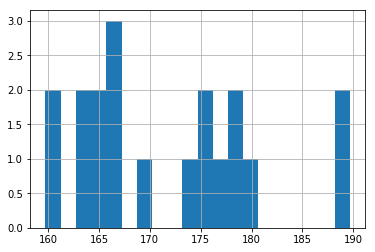

In [142]:
size1_range.hist(bins=20)   #  histogram for size1_range

<a id='Groupby'></a>
## 10. Groupby

In [143]:
df = users.copy()
df

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


In [144]:
for grp, data in df.groupby("job"):
    print('\n JOB = ', grp)
    print(data)


 JOB =  engineer
   age gender       job   name  height
4   33      M  engineer  peter     NaN

 JOB =  manager
   age gender      job  name  height
3   58      F  manager  paul     NaN

 JOB =  scientist
   age gender        job   name  height
5   44      F  scientist  julie   171.0

 JOB =  student
   age gender      job   name  height
0   19      F  student  alice   165.0
1   26      M  student   john   180.0
2   22      M  student   eric   175.0


In [145]:
df.groupby('job').mean()

,age,height
job,,
engineer,33.000000,NaN
manager,58.000000,NaN
scientist,44.000000,171.000000
student,22.333333,173.333333


<a id='File I/O'></a>
## 11. File I/O

<a id='Write to .csv files'></a>
### Write to .csv files

In [146]:
import tempfile, os.path
tmpdir = tempfile.gettempdir()
tmpdir

'/var/folders/kx/bf6cqwwd57q7684q2l7ntyz00000gp/T'

In [147]:
csv_filename = os.path.join(tmpdir, "users.csv")
users.to_csv(csv_filename, index=False)

In [150]:
mydir = './'
csv_file = os.path.join(mydir, "users.csv")
users.to_csv(csv_file, index=False)

<a id='Read from .csv files'></a>
### Read from .csv files

In [151]:
other = pd.read_csv(csv_file)
other

,age,gender,job,name,height
0,19,F,student,alice,165.0
1,26,M,student,john,180.0
2,22,M,student,eric,175.0
3,58,F,manager,paul,NaN
4,33,M,engineer,peter,NaN
5,44,F,scientist,julie,171.0


<a id=' Read csv from url'></a>
### Read csv from url

In [152]:
url = 'https://stats.idre.ucla.edu/stat/data/binary.csv'
idre_binary = pd.read_csv(url)
idre_binary.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [153]:
idre_binary.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [154]:
type(idre_binary)

pandas.core.frame.DataFrame

In [155]:
idre_binary.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [156]:
pd.value_counts(idre_binary["admit"], sort=False)   # ( 0 : Don't Admit ;    1 : Admit )

0    273
1    127
Name: admit, dtype: int64